In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [7]:
encode=['smoker','region']
for i in encode:
    df[i]=le.fit_transform(df[i])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
col=['age','children']
for j in col:
    df[j]=df[j].astype(float)
df.dtypes

age         float64
sex           int32
bmi         float64
children    float64
smoker        int32
region        int32
charges     float64
dtype: object

In [10]:
co=['sex','smoker','region']
for k in co:
    df[k]=df[k].astype(float)
df.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
charges     float64
dtype: object

In [11]:
print(df.head())

    age  sex     bmi  children  smoker  region      charges
0  19.0  0.0  27.900       0.0     1.0     3.0  16884.92400
1  18.0  1.0  33.770       1.0     0.0     2.0   1725.55230
2  28.0  1.0  33.000       3.0     0.0     2.0   4449.46200
3  33.0  1.0  22.705       0.0     0.0     1.0  21984.47061
4  32.0  1.0  28.880       0.0     0.0     1.0   3866.85520


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(7)
memory usage: 73.3 KB


In [13]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


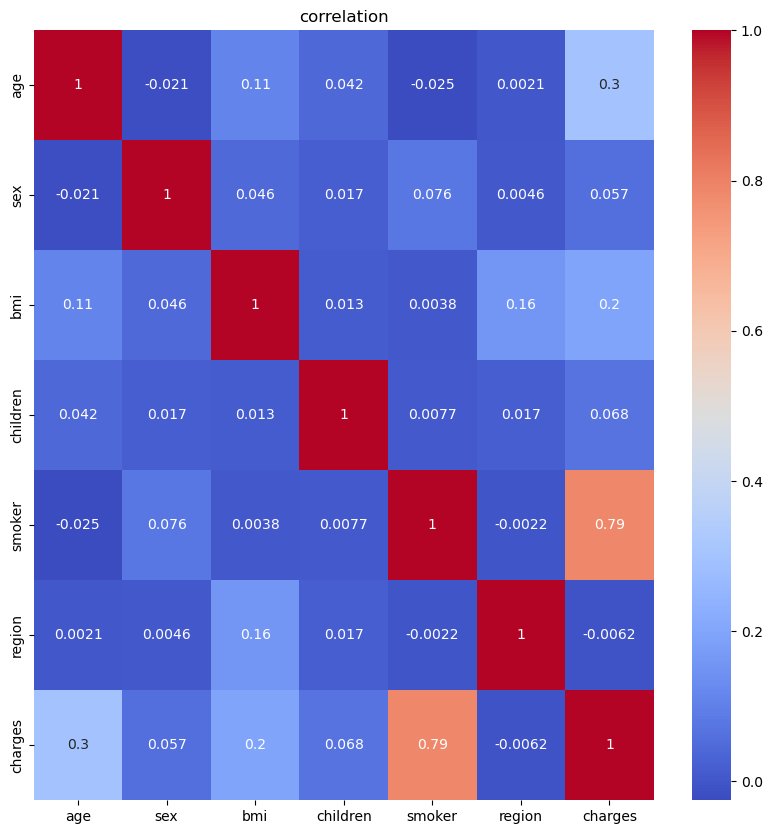

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('correlation')
plt.show()

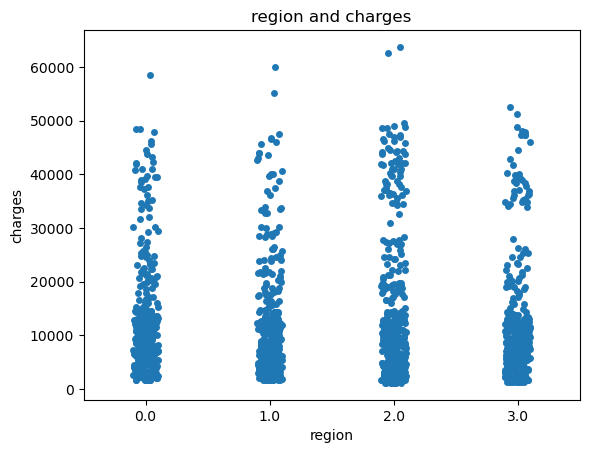

In [15]:
plt.title("region and charges")
sns.stripplot(x='region',y='charges',data=df)
plt.show()

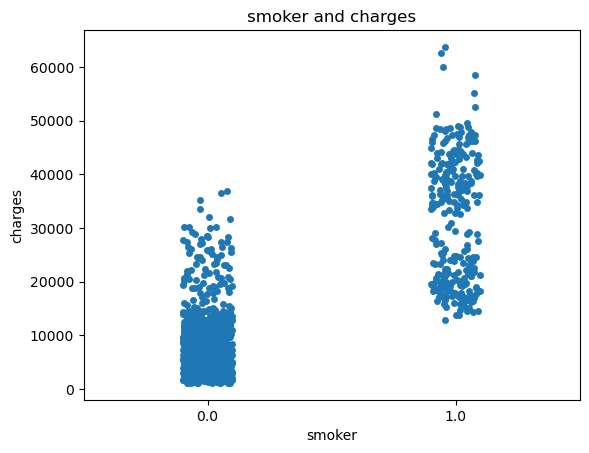

In [16]:
plt.title("smoker and charges")
sns.stripplot(x='smoker',y='charges',data=df)
plt.show()

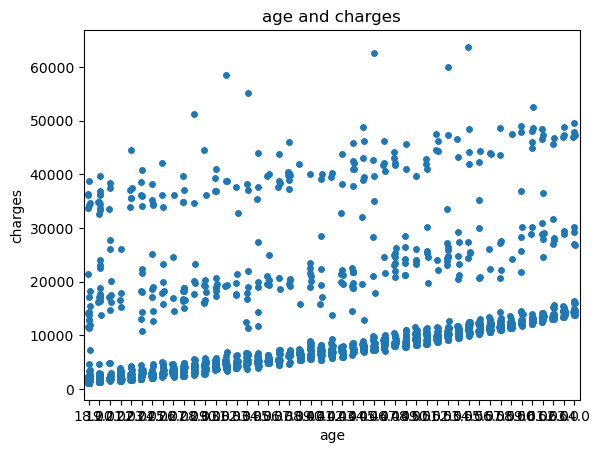

In [17]:
plt.title("age and charges")
sns.stripplot(x='age',y='charges',data=df)
plt.show()

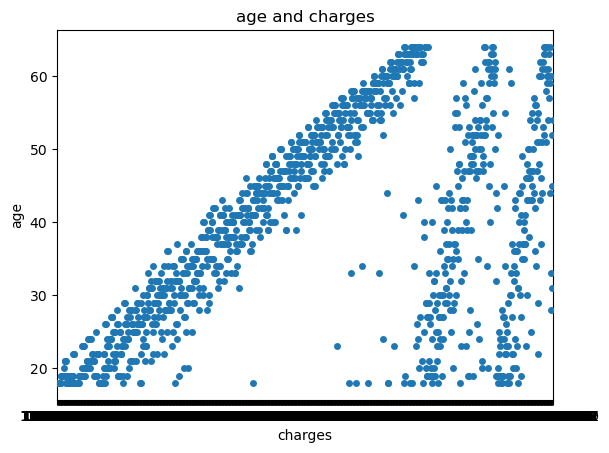

In [18]:
plt.title("age and charges")
sns.stripplot(x='charges',y='age',data=df)
plt.show()

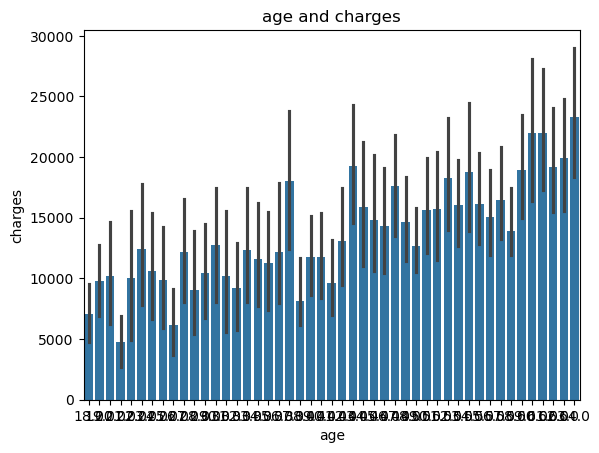

In [19]:
plt.title("age and charges")
sns.barplot(x='age',y='charges',data=df)
plt.show()

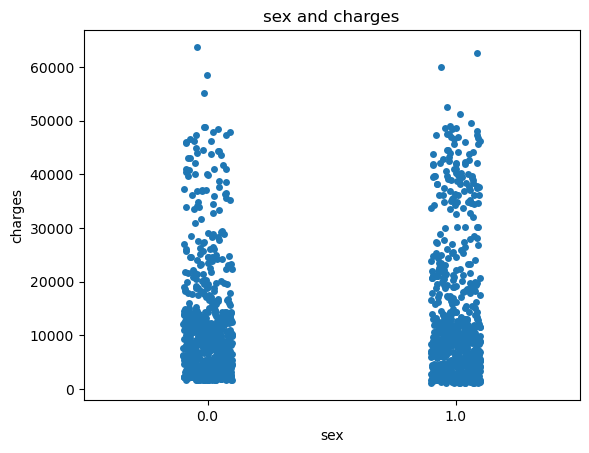

In [20]:
plt.title("sex and charges")
sns.stripplot(x='sex',y='charges',data=df)
plt.show()

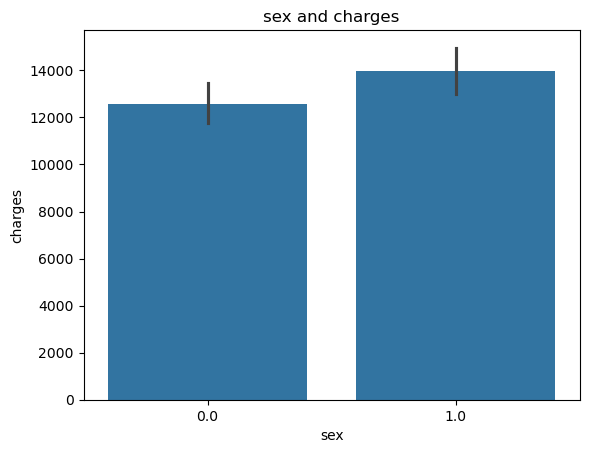

In [21]:
plt.title("sex and charges")
sns.barplot(x='sex',y='charges',data=df)
plt.show()

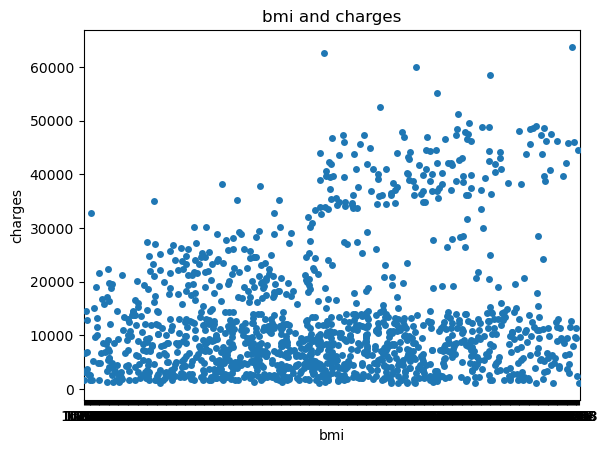

In [22]:
plt.title("bmi and charges")
sns.stripplot(x='bmi',y='charges',data=df)
plt.show()

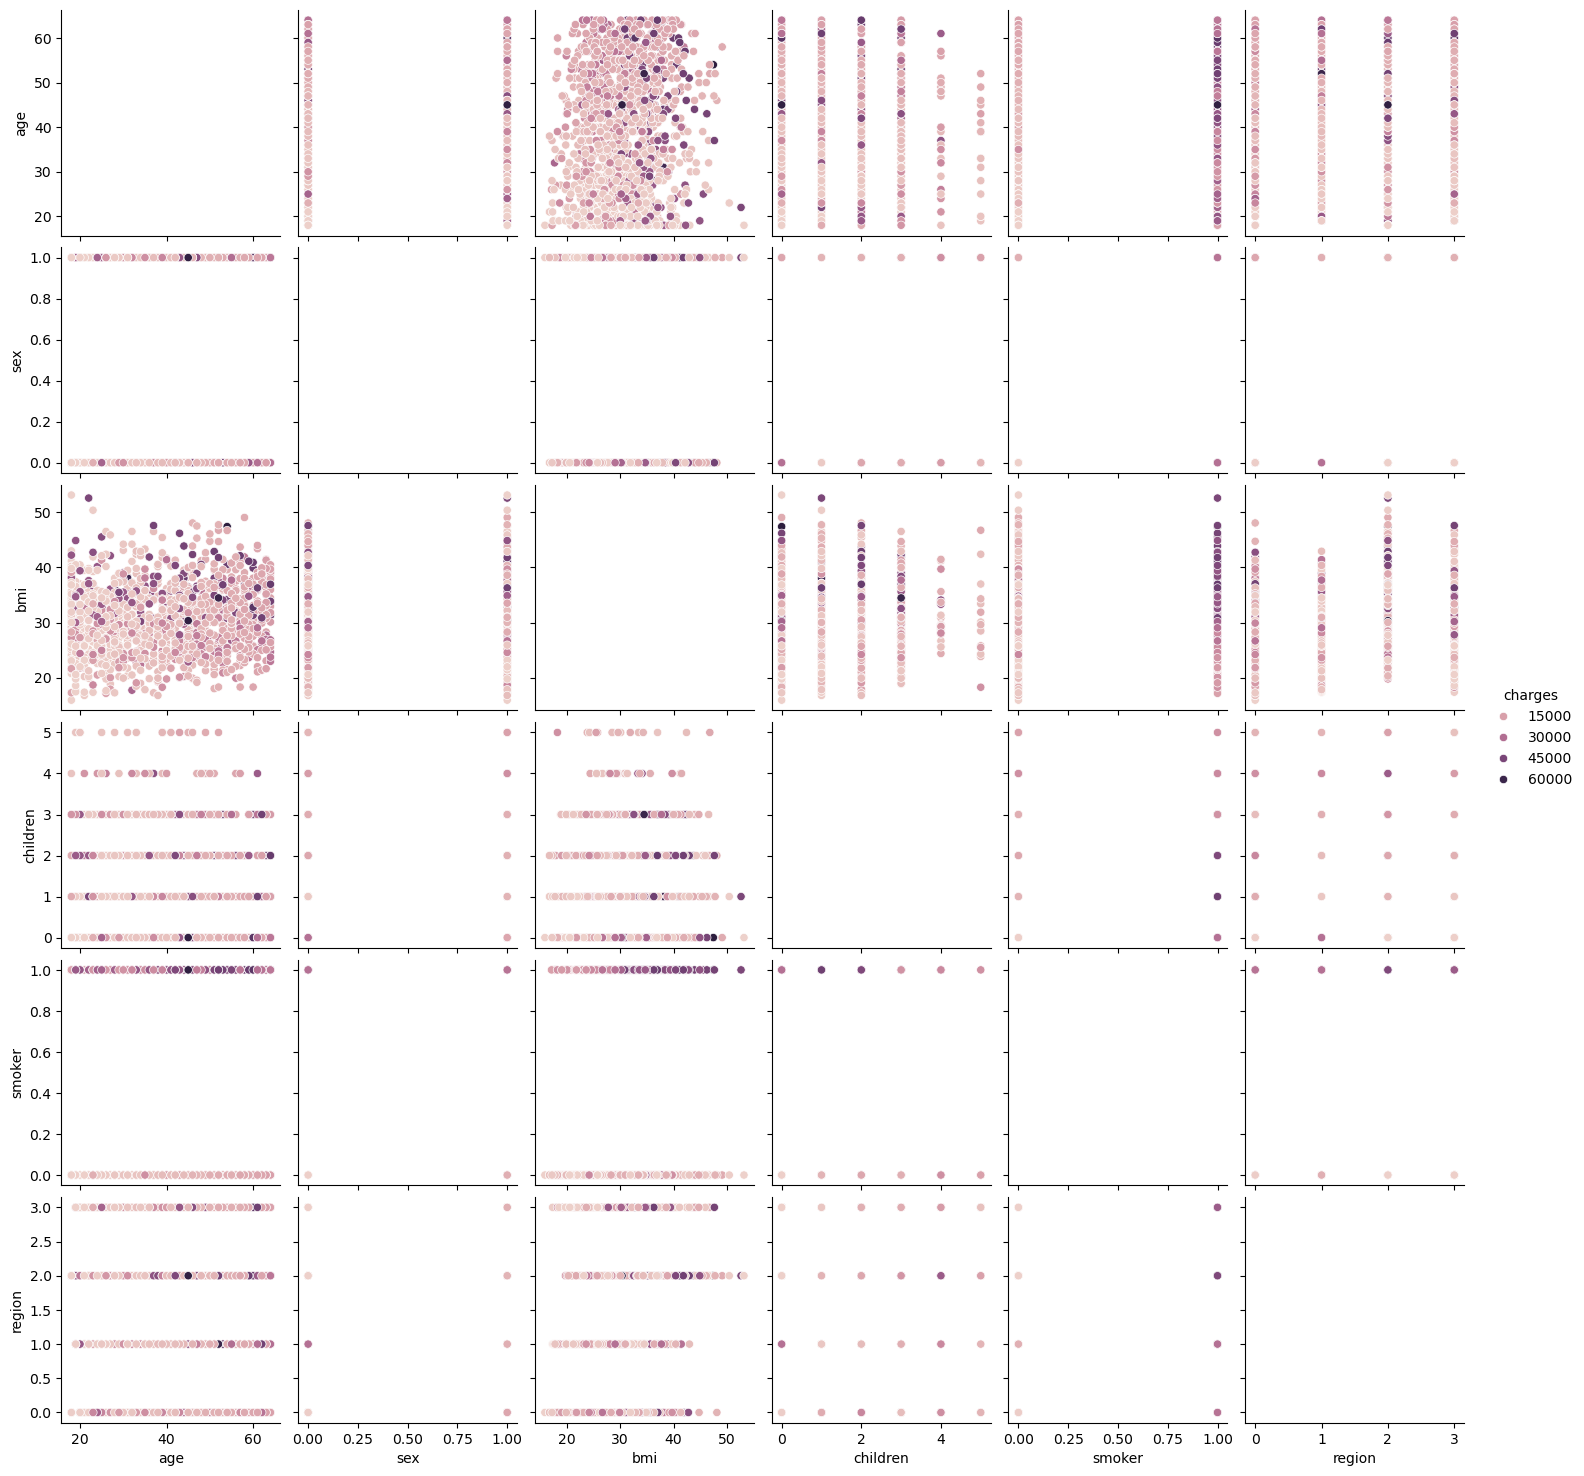

In [23]:
sns.pairplot(df,hue='charges')
plt.show()

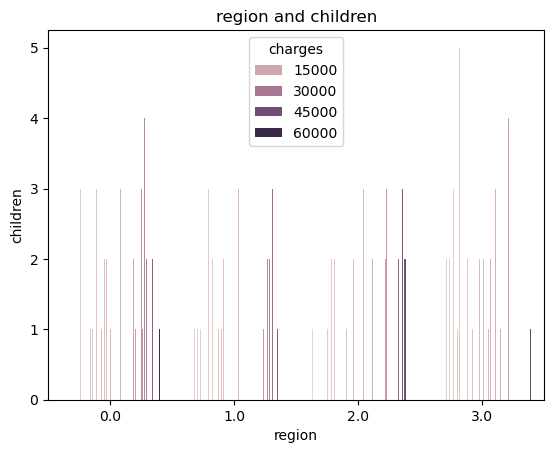

In [24]:
plt.title("region and children")
sns.barplot(x='region',y='children',data=df,hue='charges')
plt.show()

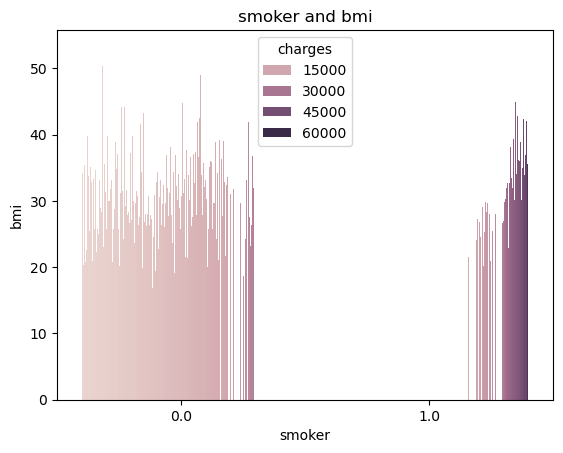

In [25]:
plt.title("smoker and bmi")
sns.barplot(x='smoker',y='bmi',data=df,hue='charges')
plt.show()

In [26]:
x=df.drop(['charges'],axis=1)
y=df['charges']
x

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.900,0.0,1.0,3.0
1,18.0,1.0,33.770,1.0,0.0,2.0
2,28.0,1.0,33.000,3.0,0.0,2.0
3,33.0,1.0,22.705,0.0,0.0,1.0
4,32.0,1.0,28.880,0.0,0.0,1.0
...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,0.0,1.0
1334,18.0,0.0,31.920,0.0,0.0,0.0
1335,18.0,0.0,36.850,0.0,0.0,2.0
1336,21.0,0.0,25.800,0.0,0.0,3.0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)

In [29]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_s=s.fit_transform(x_train)
xt_s=s.transform(x_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
Chargescalculator=RandomForestRegressor(random_state=6)

In [32]:
Chargescalculator.fit(x_s,y_train)

RandomForestRegressor(random_state=6)

In [33]:
cc=Chargescalculator.predict(xt_s)

In [34]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,r2_score

In [35]:
print(mean_absolute_error(y_test,cc))
print(mean_squared_error(y_test,cc))
print(root_mean_squared_error(y_test,cc))
print(r2_score(y_test,cc))

2403.3351048349373
19581942.946386725
4425.148917989848
0.8578351239056726


In [36]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
o=((df<(q1-1.5*iqr))|(df<(q3+1.5*iqr)))
o

,age,sex,bmi,children,smoker,region,charges
0,True,True,True,True,False,True,True
1,True,True,True,True,False,True,True
2,True,True,True,True,False,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...
1333,True,True,True,True,False,True,True
1334,True,True,True,True,False,True,True
1335,True,True,True,True,False,True,True
1336,True,True,True,True,False,True,True


In [37]:
j=['sex','children','region']
ds=df.drop(j,axis=1)
ds

,age,bmi,smoker,charges
0,19.0,27.900,1.0,16884.92400
1,18.0,33.770,0.0,1725.55230
2,28.0,33.000,0.0,4449.46200
3,33.0,22.705,0.0,21984.47061
4,32.0,28.880,0.0,3866.85520
...,...,...,...,...
1333,50.0,30.970,0.0,10600.54830
1334,18.0,31.920,0.0,2205.98080
1335,18.0,36.850,0.0,1629.83350
1336,21.0,25.800,0.0,2007.94500


In [38]:
x1=ds.drop(['charges'],axis=1)
y1=ds['charges']
x1

,age,bmi,smoker
0,19.0,27.900,1.0
1,18.0,33.770,0.0
2,28.0,33.000,0.0
3,33.0,22.705,0.0
4,32.0,28.880,0.0
...,...,...,...
1333,50.0,30.970,0.0
1334,18.0,31.920,0.0
1335,18.0,36.850,0.0
1336,21.0,25.800,0.0


In [39]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=6)

In [40]:
sc=StandardScaler()
x1_s=sc.fit_transform(x1_train)
xt1_s=sc.transform(x1_test)

In [41]:
charges_cal=RandomForestRegressor(random_state=6)
charges_cal.fit(x1_s,y1_train)

RandomForestRegressor(random_state=6)

In [42]:
chc=charges_cal.predict(xt1_s)

In [43]:
print(mean_absolute_error(y1_test,chc))
print(mean_squared_error(y1_test,chc))
print(root_mean_squared_error(y1_test,chc))
print(r2_score(y1_test,chc))

2802.8523662082425
24982125.66178281
4998.212246572049
0.818629805581391


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
charges_c=GradientBoostingRegressor(random_state=6)
charges_c.fit(x_s,y_train)

GradientBoostingRegressor(random_state=6)

In [45]:
chca=charges_c.predict(xt_s)

In [46]:
print(mean_absolute_error(y_test,chca))
print(mean_squared_error(y_test,chca))
print(root_mean_squared_error(y_test,chca))
print(r2_score(y_test,chca))

2330.8656829413603
17544019.690061156
4188.558187498552
0.8726304436560415


In [47]:
imp=charges_cal.feature_importances_
imfea=np.argsort(imp)[::-1]
print(imfea)

[2 1 0]


In [48]:
from sklearn.model_selection import GridSearchCV

In [112]:
pg={'n_estimators':[50,100,500,1000],'learning_rate':[0.01,0.1,0.2],'max_depth':[2,5,6,9],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,5],'subsample':[0.8,0.9,1.0],'max_features':['auto','sqrt','log2']}

In [50]:
gs=GridSearchCV(estimator=charges_c,param_grid=pg,cv=5,n_jobs=-1,verbose=2,scoring='r2')

In [51]:
gs.fit(x_s,y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=6),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 5, 6, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 500, 1000],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='r2', verbose=2)

In [52]:
print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
0.8383596662112565


In [53]:
chaca=gs.best_estimator_.predict(xt_s)

In [54]:
print(mean_absolute_error(y_test,chaca))
print(mean_squared_error(y_test,chaca))
print(root_mean_squared_error(y_test,chaca))
print(r2_score(y_test,chaca))

2374.281710827252
16497583.407293944
4061.721729426321
0.8802275694819882
